<a href="https://colab.research.google.com/github/annisatwain/annisatawainella/blob/main/annisatawainella/TugasDLTM4/epoch50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'keras-pretrained-models:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2798%2F7251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T044927Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5b67846f17208601835c2f344a11f2fd2302efd873922fb40a6d02851cd4dda8b983aa77bea3d1c24826aa3d67767fe23a66ec248427085ffe4bc4b585c5c893decab62f7f5319db3e1a29036bac16bb748db9f02fca39b2e3b8ae059c80469a78de3048af650e8cabdacde0f9c93031967eea2af1cbcffc3ae3516db2fe7d61c62a9b91b2f692be80bf584fef61d590f217417d0ba171ddc5e27ae099b7bfc2d402fc2580d8b53f0d787778934548d58630d611ceca63e02cc2b12b9a55db08b84bbcab82442c3dd20e52b1a5812940292ec5012622f7543112041a2e4cfbc7abf58ba982088dbca339f0e1e4047ce53823baacaa987df82d6c29a2d142e641,fer2013:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F786787%2F1351797%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T044927Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D333ce5ea383c1ad6ad4b49e67046e95c4e96f6550d337f064097b5fcbc93773adb22d4ed226e17cf98119c78bdb3acd7a21ae6ff47e7aad6b61f6326de630d451f49a1f208cc624b412687d52e1018d7110e89b13b184e8ab86cb1b1c8c12ad04ff2ab71b405c636bb8ab44162e5d05effebb1adcbc7b13361db060b85a2b4ea51f3e70078b4e21ba512f91d4e79d9096ef7b16f88a68159cf9f0d202582ff63ed05620c4b4dcd404010bf8377f1175ac97df310c6a031f7642f04673c60e0403001bb028fe027cce85f7ea6e44b469f4b658305f45c824f9ce55b87d252c48293c91624f497f192000659098ab5da7239b274d6be777a6d37a81e4edf50389a,emotion-detection-fer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1028436%2F1732825%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T044928Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D796d0c278293e499148979340b21d2dc4c2fc90140f2f631af30ecf85f3fdd4167ea93e9972659cb7c2218d31104aced4a1c36dab5be26559ffc1178b7a6d49b63fffceab4e8ec62f650d01b9a3a91c3a984abc3cf323234f76a377d42fa3549378436c6576c0735ad0f7b65518bd800ff3132c40734cf267e2534f718229a2967f96a12e48f41b31e93b7d16b1fbd54eb36ae38899673e2e251045f71f3d0cba647077240c420ebbe44582053ff21e91985d1e1727698dc50d2e4a1ec338d4d93dc6727d97ed71227e66aa57090ee952c3aa339e5c365d0b53a973ba0e5b1e3dc49d43a1a8fc190d7fa5bc05c6402c488bdeff37d2e77f6ce4a3978fb1c98ef'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 989248706 bytes downloaded
Downloaded and uncompressed: keras-pretrained-models
[==================================================] 63252113 bytes downloaded
Downloaded and uncompressed: fer2013
[==================================================] 68327503 bytes downloaded
Downloaded and uncompressed: emotion-detection-fer
Data source import complete.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [4]:
train_dir = "../input/emotion-detection-fer/train" #passing the path with training images
test_dir = "../input/emotion-detection-fer/test"   #passing the path with testing images

In [5]:
img_size = 48 #original size of the image

In [6]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [7]:
"""
Applying data augmentation to the images as we read
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [8]:
"""
Modeling


model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units = 32,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dense(7,activation = 'softmax'))

"""

"\nModeling\n\n\nmodel = Sequential()\nmodel.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\n\nmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\n\nmodel.add(Flatten())\nmodel.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(units = 64,activation = 'relu'

In [9]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [10]:
epochs = 50
batch_size = 64

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [12]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/50
359/359 [==============================] - 36s 68ms/step - loss: 5.3617 - accuracy: 0.2425 - val_loss: 3.5510 - val_accuracy: 0.2472
Epoch 2/50
359/359 [==============================] - 23s 64ms/step - loss: 2.4027 - accuracy: 0.3513 - val_loss: 3.1203 - val_accuracy: 0.2737
Epoch 3/50
359/359 [==============================] - 22s 60ms/step - loss: 2.3794 - accuracy: 0.4269 - val_loss: 2.2981 - val_accuracy: 0.4288
Epoch 4/50
359/359 [==============================] - 23s 65ms/step - loss: 2.2142 - accuracy: 0.4613 - val_loss: 2.3732 - val_accuracy: 0.4162
Epoch 5/50
359/359 [==============================] - 22s 62ms/step - loss: 2.1829 - accuracy: 0.4850 - val_loss: 2.2863 - val_accuracy: 0.4651
Epoch 6/50
359/359 [==============================] - 22s 62ms/step - loss: 2.1040 - accuracy: 0.4927 - val_loss: 2.1837 - val_accuracy: 0.4358
Epoch 7/50
359/359 [==============================] - 22s 62ms/step - loss: 2.0650 - accuracy: 0.5020 - val_loss: 2.0563 - val_accuracy:

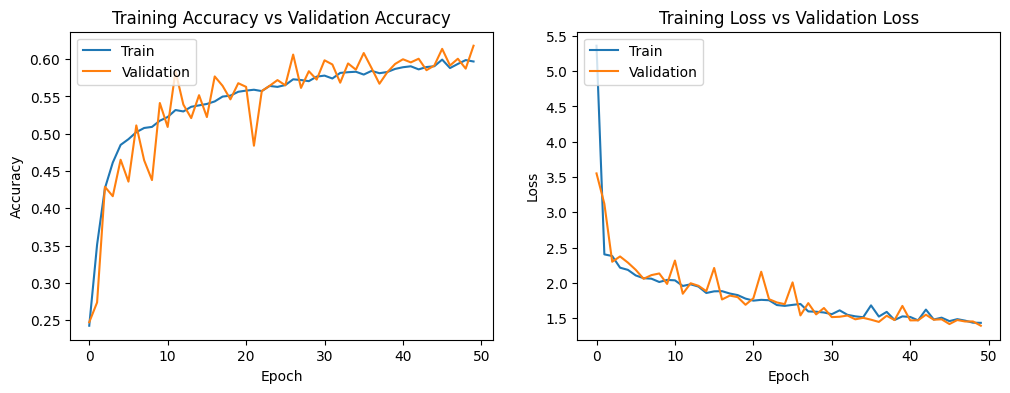

In [13]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [14]:
model.save('model_optimal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(48, 48)


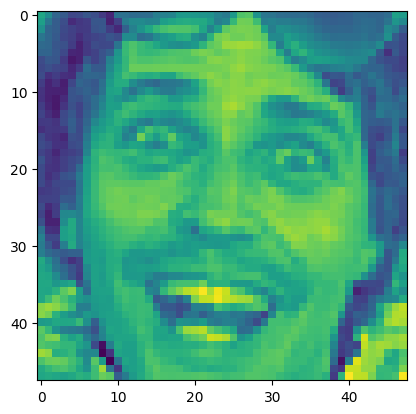

In [15]:
img = image.load_img("../input/emotion-detection-fer/test/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [16]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [17]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 1s 512ms/step
[0.0, 0.0, 5.280103e-27, 0.9999999, 0.0, 0.0, 1.1397294e-07]


In [18]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


In [19]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 21ms/step - loss: 1.3909 - accuracy: 0.6180
final train accuracy = 63.25 , validation accuracy = 61.80


In [20]:
model.save_weights('model_weights.h5')